In [18]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Create Credit Card Dataset
- There two main font variations used in credit cards

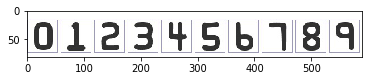

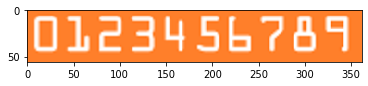

In [7]:
cc1 = plt.imread('creditcard_digits1.jpg')
plt.imshow(cc1, cmap='gray')
plt.show()

cc2 = plt.imread('creditcard_digits2.jpg')
plt.imshow(cc2, cmap='gray')
plt.show()

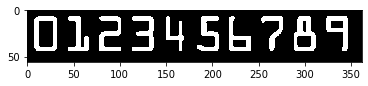

In [11]:
cc1 = cv2.imread('creditcard_digits2.jpg', 0)
# apply thresholding
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow("Digits 2 Thresholded", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(th2, cmap='gray')

## Generate an Augumentated Dataset from these two samples 


In [12]:
# Create dataset directories

import os

def makedir(directory):
    """Creates a new directory if it does not exist"""
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None, 0
    
for i in range(0, 10):
    directory_name = "./credit_card/train/"+str(i)
    print(directory_name)
    makedir(directory_name) 

for i in range(0, 10):
    directory_name = "./credit_card/test/"+str(i)
    print(directory_name)
    makedir(directory_name)

./credit_card/train/0
./credit_card/train/1
./credit_card/train/2
./credit_card/train/3
./credit_card/train/4
./credit_card/train/5
./credit_card/train/6
./credit_card/train/7
./credit_card/train/8
./credit_card/train/9
./credit_card/test/0
./credit_card/test/1
./credit_card/test/2
./credit_card/test/3
./credit_card/test/4
./credit_card/test/5
./credit_card/test/6
./credit_card/test/7
./credit_card/test/8
./credit_card/test/9


## Make Data Augmentation Functions
These are used to perform image manipulation and pre-processing tasks

In [13]:
import numpy as np 
import random
from scipy.ndimage import convolve

def DigitAugmentation(frame, dim=32):
    """Randomly alters the image using noise, pixelation and streching image functions"""
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    random_num = np.random.randint(0,9)

    if (random_num % 2 == 0):
        frame = add_noise(frame)
        frame = stretch(frame)
    if (random_num % 3 == 0):
        frame = pixelate(frame)
    
    frame = cv2.resize(frame, (dim, dim), interpolation = cv2.INTER_AREA)

    return frame 

def add_noise(image):
    """Addings noise to image"""
    prob = random.uniform(0.01, 0.05)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    noisy = image.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy

def pixelate(image):
    "Pixelates an image by reducing the resolution then upscaling it"
    dim = np.random.randint(8,12)
    image = cv2.resize(image, (dim, dim), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (16, 16), interpolation = cv2.INTER_AREA)
    return image

def stretch(image):
    "Randomly applies different degrees of stretch to image"
    ran = np.random.randint(0,3)*2
    if np.random.randint(0, 2) == 0:
        frame = cv2.resize(image, (32, ran+32), interpolation = cv2.INTER_AREA)
        return frame[int(ran/2):int(ran+32)-int(ran/2), 0:32]
    else:
        frame = cv2.resize(image, (ran+32, 32), interpolation = cv2.INTER_AREA)
        return frame[0:32, int(ran/2):int(ran+32)-int(ran/2)]
    
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

## Testing augmentation functions

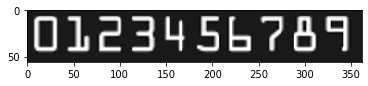

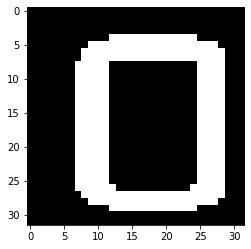

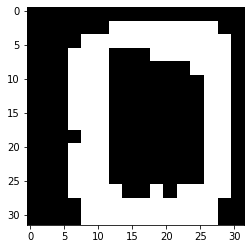

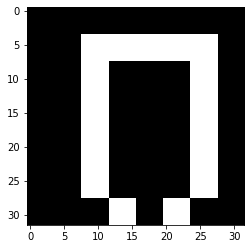

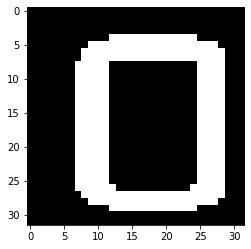

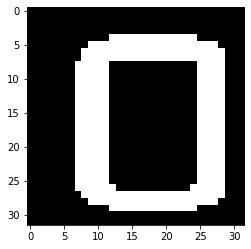

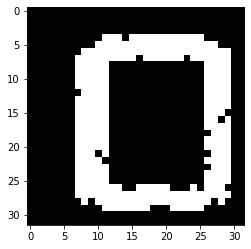

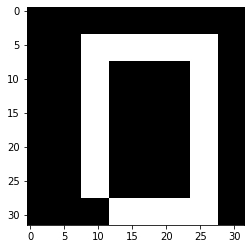

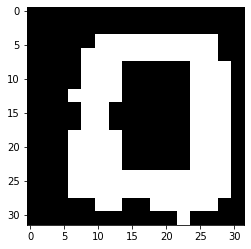

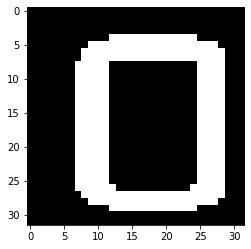

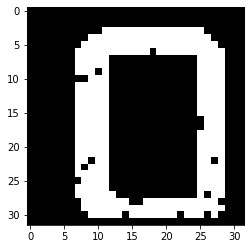

In [16]:
cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(cc1, cmap='gray')
plt.show()

# This is the coordinates of the region enclosing  the first digit
# This is preset and was done manually based on this specific image
region = [(0, 0), (35, 48)]

# Assigns values to each region for ease of interpretation
top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,1): # We only look at the first digit in testing out augmentation functions
    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    for j in range(0,10):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        plt.imshow(roi_otsu, cmap='gray')
        plt.show()
        

## Creating Training Data (2000 variations of each number)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Augmenting Digit -  0


 10%|████████▎                                                                          | 1/10 [00:05<00:48,  5.38s/it]

Augmenting Digit -  1


 20%|████████████████▌                                                                  | 2/10 [00:16<00:57,  7.15s/it]

Augmenting Digit -  2


 30%|████████████████████████▉                                                          | 3/10 [00:23<00:49,  7.14s/it]

Augmenting Digit -  3


 40%|█████████████████████████████████▏                                                 | 4/10 [00:29<00:39,  6.64s/it]

Augmenting Digit -  4


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:38<00:36,  7.30s/it]

Augmenting Digit -  5


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:46<00:30,  7.52s/it]

Augmenting Digit -  6


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:52<00:21,  7.16s/it]

Augmenting Digit -  7


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:58<00:13,  6.97s/it]

Augmenting Digit -  8


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:04<00:06,  6.56s/it]

Augmenting Digit -  9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.98s/it]


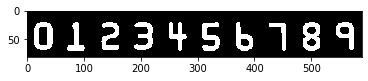

In [19]:
# Creating 2000 Images for each digit in creditcard_digits1 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')
plt.show()

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in tqdm(range(0, 10)):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 2000 versions of each image for our dataset
    for j in range(0, 2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv=True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)

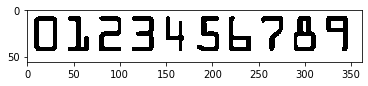

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Augmenting Digit -  0


 10%|████████▎                                                                          | 1/10 [00:05<00:45,  5.11s/it]

Augmenting Digit -  1


 20%|████████████████▌                                                                  | 2/10 [00:09<00:38,  4.85s/it]

Augmenting Digit -  2


 30%|████████████████████████▉                                                          | 3/10 [00:16<00:38,  5.49s/it]

Augmenting Digit -  3


 40%|█████████████████████████████████▏                                                 | 4/10 [00:23<00:35,  5.92s/it]

Augmenting Digit -  4


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:30<00:31,  6.22s/it]

Augmenting Digit -  5


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:34<00:23,  5.77s/it]

Augmenting Digit -  6


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:41<00:17,  5.94s/it]

Augmenting Digit -  7


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:46<00:11,  5.71s/it]

Augmenting Digit -  8


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:52<00:05,  5.86s/it]

Augmenting Digit -  9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.11s/it]


In [20]:
# Creating 2000 Images for each digit in creditcard_digits2 - TRAINING DATA

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')
plt.show()

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in tqdm(range(0,10)):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 2000 versions of each image for our dataset
    for j in range(0, 2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv=False)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)

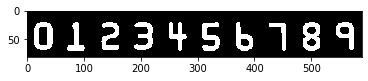

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [21]:
# Creating 200 Images for each digit in creditcard_digits1 - TEST DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')
plt.show()

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0, 10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0, 200):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)

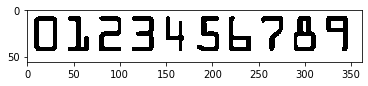

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [22]:
# Creating 200 Images for each digit in creditcard_digits2 - TEST DATA

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')
plt.show()

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0, 10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0, 200):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)

# 2. Creating Classifier

In [23]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import keras

input_shape = (32, 32, 3)
img_width = 32
img_height = 32
num_classes = 10
nb_train_samples = 40000
nb_validation_samples = 4000
batch_size = 16
epochs = 5

train_data_dir = './credit_card/train'
validation_data_dir = './credit_card/test'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 10,           # randomly applies rotations
      width_shift_range = 0.25,       # randomly applies width shifting
      height_shift_range = 0.25,      # randomly applies height shifting
      shear_range=0.5,
      zoom_range=0.5,
      horizontal_flip = False,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False)    

Using TensorFlow backend.


Found 40000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


## Creating Model based on the LeNet CNN Architecture

In [24]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),
                 padding = "same", 
                 input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(50, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])
    
print(model.summary())

W0804 14:09:47.675755 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 14:09:47.678743 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:09:47.906080 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 14:09:47.937628 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
__________

## Training Model

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("creditcard.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

W0804 14:39:28.308234 24532 deprecation.py:323] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 14:39:28.360092 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0804 14:39:28.444865 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0804 14:39:28.519665 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-

Epoch 1/5


W0804 14:39:28.905289 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0804 14:39:28.906174 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0804 14:39:29.155737 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0804 14:39:29.159737 24532 module_wrapper.py:139] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable

2500/2500 [==============================] - 475s 190ms/step - loss: 0.2812 - acc: 0.9060 - val_loss: 0.0101 - val_acc: 0.9955

Epoch 00001: val_loss improved from inf to 0.01007, saving model to creditcard.h5
Epoch 2/5
2500/2500 [==============================] - 159s 64ms/step - loss: 0.0988 - acc: 0.9674 - val_loss: 0.0031 - val_acc: 0.9990

Epoch 00002: val_loss improved from 0.01007 to 0.00309, saving model to creditcard.h5
Epoch 3/5
2500/2500 [==============================] - 154s 62ms/step - loss: 0.0767 - acc: 0.9744 - val_loss: 0.0013 - val_acc: 0.9998

Epoch 00003: val_loss improved from 0.00309 to 0.00128, saving model to creditcard.h5
Epoch 4/5
2500/2500 [==============================] - 164s 66ms/step - loss: 0.0676 - acc: 0.9781 - val_loss: 0.0012 - val_acc: 0.9995

Epoch 00004: val_loss improved from 0.00128 to 0.00122, saving model to creditcard.h5
Epoch 5/5
2500/2500 [==============================] - 153s 61ms/step - loss: 0.0599 - acc: 0.9801 - val_loss: 0.0049 - v

# 3. Extract a Credit Card from the backgroud

In [72]:
import cv2
import numpy as np
import imutils
import os

def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

def doc_Scan(image):
    ratio = image.shape[0] / 500.0

    orig = image.copy()
    image = imutils.resize(image, height=500)
    orig_height, orig_width = image.shape[:2]
    Original_Area = orig_height * orig_width
    
    # convert the image to grayscale, blur it, and find edges
    # in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 50, 200)

    # show the original image and the edge detected image
    cv2.imshow('original', image)
    cv2.waitKey(1)
    cv2.imshow('eged', edged)
    cv2.waitKey(1)
    
    # find the contours in the edged image, keeping only the
    # largest ones, and initialize the screen contour
    contours  = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
    
    # loop over the contours
    for c in contours:
        # approximate the contour
        area = cv2.contourArea(c)
        if area < (Original_Area/3):
            print("Error Image Invalid")
            return("ERROR")
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if our approximated contour has four points, then we
        # can assume that we have found our screen
        if len(approx) == 4:
            screenCnt = approx
            break

    # show the contour (outline) of the piece of paper
    cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
    cv2.imshow('contour outline', image)
    cv2.waitKey(1)

    warped = four_point_transform(orig, screenCnt.reshape(4, 2)*ratio)
    # convert the warped image to grayscale, then threshold it
    # to give it that 'black and white' paper effect
    cv2.resize(warped, (640, 403), interpolation = cv2.INTER_AREA)
    cv2.imwrite("credit_card_color.jpg", warped)
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    warped = warped.astype("uint8") * 255
    cv2.imshow("Extracted Credit Card", warped)
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    return warped

## Extract Credit Card and the Region of Interest (ROI)

True

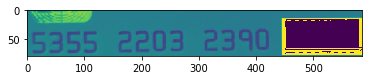

In [73]:
image = cv2.imread('test_card.jpg')
image = doc_Scan(image)

region = [(55, 210), (640, 290)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

# Extracting the area were the credit numbers are located
roi = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
plt.imshow(roi)
cv2.imwrite("credit_card_extracted_digits.jpg", roi)

## Loading trained model

In [74]:
from keras.models import load_model
import keras

classifier = load_model('creditcard.h5')

# Test on extracted image

In [82]:
def x_cord_contour(contours):
    # Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

img = cv2.imread('credit_card_extracted_digits.jpg')
orig_img = cv2.imread('credit_card_color.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("image", img)
cv2.waitKey(0)

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#cv2.imshow("blurred", blurred)
#cv2.waitKey(0)

edged = cv2.Canny(blurred, 30, 150)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:16] # Change this to 16 to get all digits
contours = sorted(contours, key=x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    
    if w >= 5 and h >= 25 and cv2.contourArea(c) < 1000:
        roi = blurred[y:y + h, x:x + w]
        #ret, roi = cv2.threshold(roi, 20, 255,cv2.THRESH_BINARY_INV)
        #cv2.imshow("ROI1", roi)
        roi_otsu = pre_process(roi, True)
        #cv2.imshow("ROI2", roi_otsu)
        roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
        roi_otsu = keras.preprocessing.image.img_to_array(roi_otsu)
        roi_otsu = roi_otsu * 1./255
        roi_otsu = np.expand_dims(roi_otsu, axis=0)
        image = np.vstack([roi_otsu])
        label = str(classifier.predict_classes(image, batch_size = 10))[1]
        #print(label)
        (x, y, w, h) = (x+region[0][0], y+region[0][1], w, h)
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(orig_img, label, (x , y + 90), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

cv2.imshow("image", orig_img)
cv2.waitKey(0) 

-1